In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,log_loss,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\Denny\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Denny\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Denny\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Denny\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Denny\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [9]:
data=pd.read_csv('moore.csv',header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [11]:
x=data[0]
y=data[1]

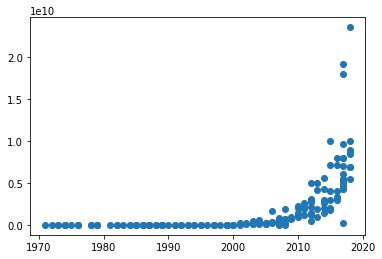

In [14]:
plt.scatter(x,y)

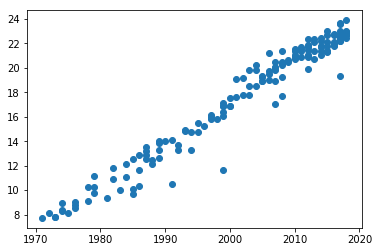

In [15]:
y=np.log(y)
plt.scatter(x,y)

In [16]:
x=x-x.mean()

In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

def schedule(epoch,lr):
    if epoch>=50:
        return 0.0001
    return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

r=model.fit(x,y,epochs=200,callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 203us/sample - loss: 344.0094
Epoch 2/200
162/162 [==============================] - 0s 31us/sample - loss: 469.8579
Epoch 3/200
162/162 [==============================] - 0s 37us/sample - loss: 646.8082
Epoch 4/200
162/162 [==============================] - 0s 55us/sample - loss: 464.6636
Epoch 5/200
162/162 [==============================] - 0s 74us/sample - loss: 551.4209
Epoch 6/200
162/162 [==============================] - 0s 80us/sample - loss: 265.3027
Epoch 7/200
162/162 [==============================] - 0s 80us/sample - loss: 152.1120
Epoch 8/200
162/162 [==============================] - 0s 49us/sample - loss: 91.6702
Epoch 9/200
162/162 [==============================] - 0s 49us/sample - loss: 47.3696
Epoch 10/200
162/162 [==============================] - 0s 62us/sample - loss: 40.0778
Epoch 11/200
162/162 [==============================] - 0s 62us/sample - loss: 35.5476
Epoch 12/200
162/162 [=

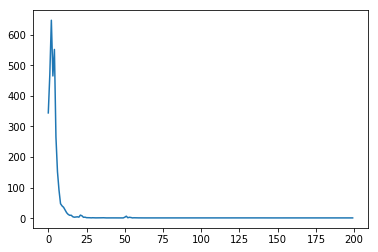

In [22]:
plt.plot(r.history['loss'],label='loss')

In [26]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3340796]], dtype=float32), array([17.75082], dtype=float32)]


In [27]:
a=model.layers[0].get_weights()[0][0,0]

0.3340796
